In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import itertools

# Reading data

In [17]:
mult_choice = pd.read_csv('multipleChoiceResponses.csv', low_memory=False)
m_c = mult_choice[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].dropna() # sin dropna 23860 rows × 10 columns con dropna 19365 rows × 10 columns
m_c = m_c.drop(0, axis=0) # quito las preguntas que aparecen al principio

surv_schema = pd.read_csv('SurveySchema.csv')

# Understanding the data 

Text(0.5,1,'Question Reliability based on Number os Answers')

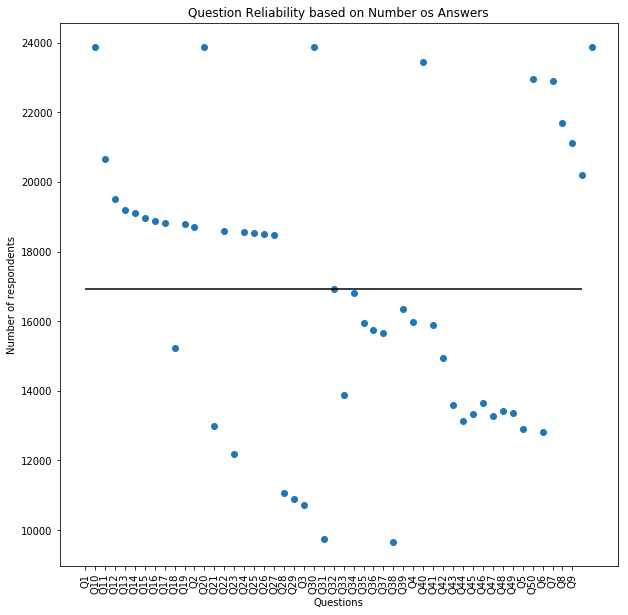

In [18]:
quest = np.array(surv_schema.loc[[0]])
len_q = np.arange(1,quest.shape[1])

num_resp = np.array(surv_schema.loc[[1]]).astype(int)  #.remove('# of Respondents:')
num_resp = np.delete(num_resp, 0)

mean_num_resp = np.mean(num_resp)

plt.figure(figsize=(10,10))
plt.scatter(len_q, num_resp)
plt.hlines(mean_num_resp, 0, 50)
plt.xlabel('Questions')
plt.xticks(range(len(surv_schema.keys()[1:51])), surv_schema.keys()[1:51], rotation=90)
plt.ylabel('Number of respondents')
plt.title('Question Reliability based on Number os Answers')

Text(0,0.5,'Number of Respondants')

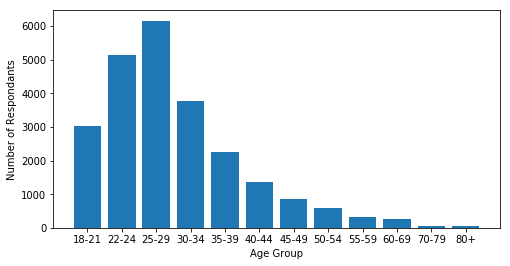

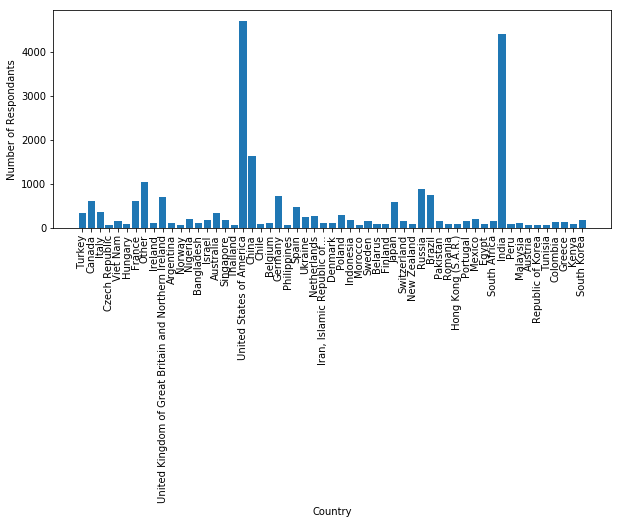

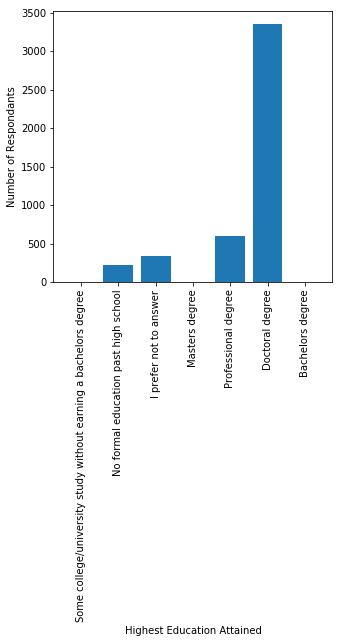

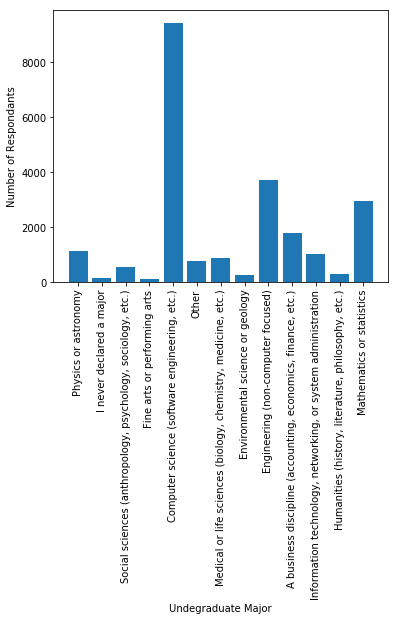

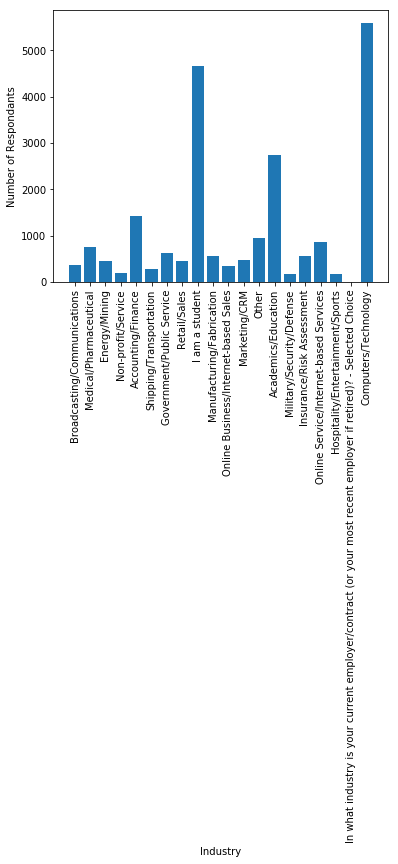

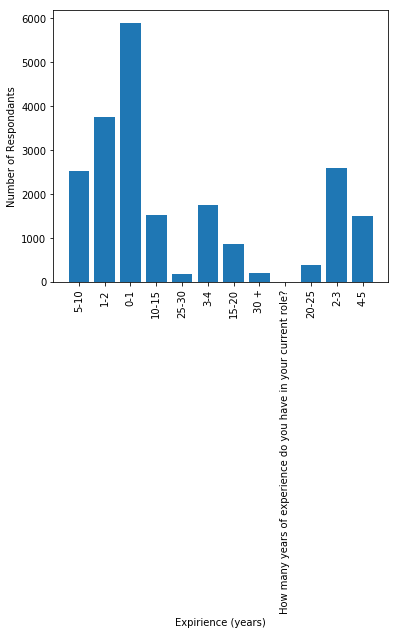

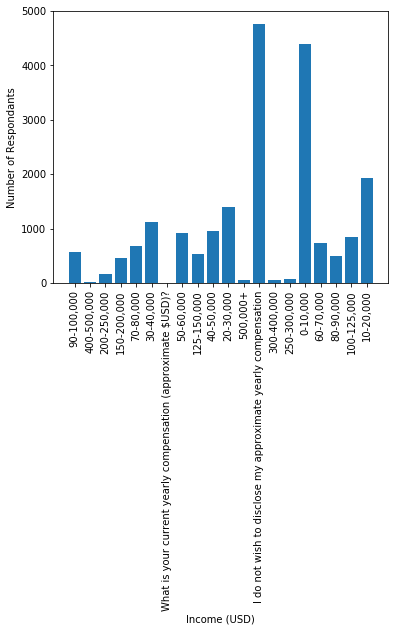

In [21]:
# Age Groups
ag = mult_choice['Q2'].values.tolist()
ags = np.array(['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70-79','80+']) # esto lo consegui de set(ag), que elimina elementos repetidos y lo voto en orden
num_ags = ags.shape[0]

ag_counter = np.zeros(num_ags)
for i in range(num_ags):
    ag_counter[i] = ag.count(ags[i])
    
plt.figure(figsize=(8,4))
plt.bar(ags, ag_counter)
plt.xlabel('Age Group')
plt.ylabel('Number of Respondants')

# Country
country = mult_choice['Q3'].values.tolist()
countries = np.array(['Turkey', 'Canada', 'Italy', 'Czech Republic', 'Viet Nam', 'Hungary', 'France', 'Other', 'Ireland', 'United Kingdom of Great Britain and Northern Ireland', 'Argentina', 'Norway', 'Nigeria', 'Bangladesh', 'Israel', 'Australia', 'Singapore', 'Thailand', 'United States of America', 'China', 'Chile', 'Belgium', 'Germany', 'Philippines', 'Spain', 'Ukraine', 'Netherlands', 'Iran, Islamic Republic of...', 'Denmark', 'Poland', 'Indonesia', 'Morocco', 'Sweden', 'Belarus', 'Finland', 'Japan', 'Switzerland', 'New Zealand', 'Russia', 'Brazil', 'Pakistan', 'Romania', 'Hong Kong (S.A.R.)', 'Portugal', 'Mexico', 'Egypt', 'South Africa', 'India', 'Peru', 'Malaysia', 'Austria', 'Republic of Korea', 'Tunisia', 'Colombia', 'Greece', 'Kenya', 'South Korea'])
num_countries = countries.shape[0]

country_counter = np.zeros(num_countries)
for i in range(num_countries):
    country_counter[i] = country.count(countries[i])

plt.figure(figsize=(10,4))
plt.bar(countries, country_counter)
plt.xticks(range(len(countries)), countries, rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Respondants')

# Highest Education Attained
hea = mult_choice['Q4'].values.tolist()
heas = np.array(['Some college/university study without earning a bachelors degree', 'No formal education past high school', 'I prefer not to answer', 'Masters degree', 'Professional degree', 'Doctoral degree', 'Bachelors degree'])
num_hea = heas.shape[0]

hea_counter = np.zeros(num_hea)
for i in range(num_hea):
    hea_counter[i] = hea.count(heas[i])

plt.figure(figsize=(5,5))
plt.bar(heas, hea_counter)
plt.xticks(range(len(heas)), heas, rotation=90)
plt.xlabel('Highest Education Attained')
plt.ylabel('Number of Respondants')

# Undergraduate Major
um = mult_choice['Q5'].values.tolist()
ums = np.array(['Physics or astronomy', 'I never declared a major', 'Social sciences (anthropology, psychology, sociology, etc.)', 'Fine arts or performing arts', 'Computer science (software engineering, etc.)', 'Other', 'Medical or life sciences (biology, chemistry, medicine, etc.)', 'Environmental science or geology', 'Engineering (non-computer focused)', 'A business discipline (accounting, economics, finance, etc.)', 'Information technology, networking, or system administration', 'Humanities (history, literature, philosophy, etc.)', 'Mathematics or statistics'])
num_um = ums.shape[0]

um_counter = np.zeros(num_um)
for i in range(num_um):
    um_counter[i] = um.count(ums[i])

plt.figure(figsize=(6,5))
plt.bar(ums, um_counter)
plt.xticks(range(len(ums)), ums, rotation=90)
plt.xlabel('Undegraduate Major')
plt.ylabel('Number of Respondants')

# Industry
ind = mult_choice['Q7'].dropna().values.tolist()
inds = np.array(['Broadcasting/Communications', 'Medical/Pharmaceutical', 'Energy/Mining', 'Non-profit/Service', 'Accounting/Finance', 'Shipping/Transportation', 'Government/Public Service', 'Retail/Sales', 'I am a student', 'Manufacturing/Fabrication', 'Online Business/Internet-based Sales', 'Marketing/CRM', 'Other', 'Academics/Education', 'Military/Security/Defense', 'Insurance/Risk Assessment', 'Online Service/Internet-based Services', 'Hospitality/Entertainment/Sports', 'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice', 'Computers/Technology'])
num_ind = inds.shape[0]

ind_counter = np.zeros(num_ind)
for i in range(num_ind):
    ind_counter[i] = ind.count(inds[i])

plt.figure(figsize=(6,5))
plt.bar(inds, ind_counter)
plt.xticks(range(len(inds)), inds, rotation=90)
plt.xlabel('Industry')
plt.ylabel('Number of Respondants')

# Expirience
exp = mult_choice['Q8'].dropna().values.tolist()
exps = np.array(['5-10', '1-2', '0-1', '10-15', '25-30', '3-4', '15-20', '30 +', 'How many years of experience do you have in your current role?', '20-25', '2-3', '4-5'])
num_exp = exps.shape[0]

exp_counter = np.zeros(num_exp)
for i in range(num_exp):
    exp_counter[i] = exp.count(exps[i])

plt.figure(figsize=(6,5))
plt.bar(exps, exp_counter)
plt.xticks(range(len(exps)), exps, rotation=90)
plt.xlabel('Expirience (years)')
plt.ylabel('Number of Respondants')

# Income
inc = mult_choice['Q9'].dropna().values.tolist()
incs = np.array(['90-100,000', '400-500,000', '200-250,000', '150-200,000', '70-80,000', '30-40,000', 'What is your current yearly compensation (approximate $USD)?', '50-60,000', '125-150,000', '40-50,000', '20-30,000', '500,000+', 'I do not wish to disclose my approximate yearly compensation', '300-400,000', '250-300,000', '0-10,000', '60-70,000', '80-90,000', '100-125,000', '10-20,000'])
num_inc = incs.shape[0]

inc_counter = np.zeros(num_inc)
for i in range(num_inc):
    inc_counter[i] = inc.count(incs[i])

plt.figure(figsize=(6,5))
plt.bar(incs, inc_counter)
plt.xticks(range(len(incs)), incs, rotation=90)
plt.xlabel('Income (USD)')
plt.ylabel('Number of Respondants')

#### From the bar charts it is kind of cler the type of population of the respondants. They age linearly increasing until 25-30 years, age in which we have the bigest group of respondants. US and India are the contries with most respondants and are very big in comparisson with the other countries which have almost insignificant quantity of people. Most of our respondants have attained a phd degree as highest education title. The undergraduate majors which are the more likely for respondants are computer science, engineering and mathematics. The industry from where they come from is most likely to be from computers/tech and actually students. From the expirience of the respondants we have an intersting fact, the biggest group has expirience of less than a year. And finally, most of the people didnt wanted to answer what was their yearly compensation and most of the respondants earn from 0-10000 USD per year

# Quantitative variable transformation

#### Data is given as strings in all the space, we have to figure out how to transform the quantitative variables to values which have sense

In [22]:
# Gender
gender = np.ones(len(m_c))
f = np.array(m_c['Q1'] == 'Female')
n = np.array(m_c['Q1'] == 'Prefer not to say')
gender[f] = 0
gender[n] = np.random.randint(0,2)
m_c['gender'] = gender

# Age (each 5 years)
age = np.ones(len(m_c))
for i in range(len(m_c)):
    age[i] = int(m_c['Q2'].values[i][:2])
m_c['age'] = age

# Highest Education (ordered)
he = np.zeros(len(m_c))
for i in range(len(m_c)): 
    if(m_c['Q4'].values[i][:4] == 'Some'):
        he[i] = 0
    elif(m_c['Q4'].values[i][:4] == 'Bach'):
        he[i] = 1
    elif(m_c['Q4'].values[i][:4] == 'Prof'):
        he[i] = 2
    elif(m_c['Q4'].values[i][:4] == 'Mast'):
        he[i] = 3
    elif(m_c['Q4'].values[i][:4] == 'Doct'):
        he[i] = 4
    else:
        he[i] = np.random.randint(0,5)
m_c['highest education'] = he

# Expirience (years)
exp = np.ones(len(m_c))
for i in range(len(m_c)):
    exp[i] = int(m_c['Q8'].values[i][:1])
m_c['expirience'] = exp

# Yearly Compensation (USD)
inc = np.ones(len(m_c))
for i in range(len(m_c)):
    if(m_c['Q9'].values[i][:1] == 'I' ):
        inc[i] = np.random.uniform(0, 500000)
    elif(m_c['Q9'].values[i] == '500,000+'):
        inc[i] = 500000
    else:
        inc[i] = int(m_c['Q9'].values[i].split('-')[0])*1000
m_c['income'] = inc

#m_c

# Data Renormalization and Regularization

#### In the data we have diferent orders of magnitud, this makes the weight of the variables vary its weight. For the analysis we want them all to weight the same. So we scale and normalize them to the interval [0,1]

In [26]:
mc_num = m_c[['gender', 'age', 'highest education', 'expirience', 'income']]

min_max_scaler = preprocessing.MinMaxScaler()
mc_scaled = min_max_scaler.fit_transform(mc_num)

mc_num = pd.DataFrame(mc_scaled, columns=['gender', 'age', 'highest education', 'expirience', 'income'])
#mc_num.head()

# PCA

#### Doesnt make sense to include the gender for the analysis

Text(0.5,1,'Gender Ratio Respondants')

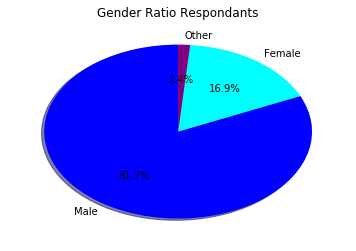

In [27]:
gender = mult_choice['Q1'].values.tolist()

m = gender.count('Male')
f = gender.count('Female')
o = gender.count('Prefer not to say')
        
count_gen = [m, f, o]
labels = 'Male', 'Female', 'Other'
colors = 'blue','cyan', 'purple'

plt.pie(count_gen, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Gender Ratio Respondants')

In [28]:
mc_num = mc_num.drop(['gender'], axis=1)

{'age': 0.18681571276672115,
 'expirience': 0.9922278224615418,
 'highest education': 0.9892343526394088,
 'income': 0.044712787374302045}

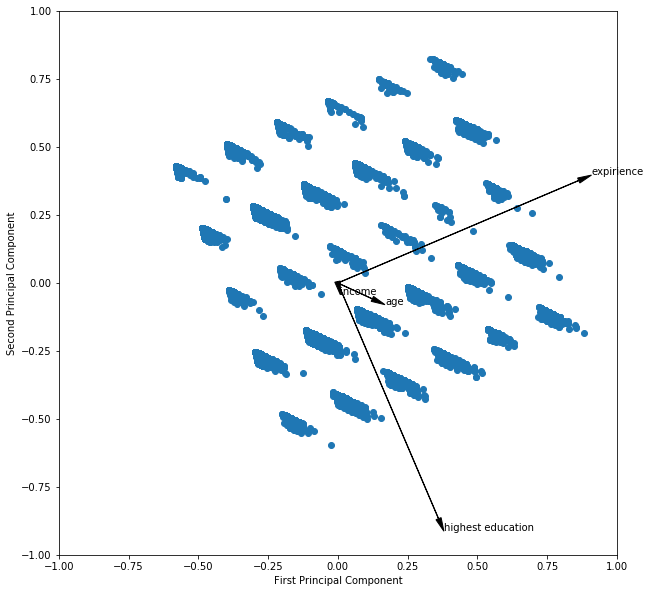

In [29]:
# PCA for 2 components
pca = PCA(n_components=2, svd_solver='full')
pca.fit(mc_num)
mc_pca = pca.transform(mc_num)
components = pca.components_

# Generates pd.DataFrame with the importance (norm) of each of the vectors
feature_importance = {mc_num.keys()[i] : np.sqrt(components[0,i]**2 + components[1,i]**2) for i in range(mc_num.shape[1])}


# Plots PCA for 2 components with the feature space generators and labels
plt.figure(figsize=(10,10))

for i in range(components.shape[1]):
    plt.arrow(0, 0, components[0,i], components[1,i], length_includes_head=True, head_width=0.02, head_length=0.05, fc='k', ec='k')
    plt.text(components[0,i], components[1,i], mc_num.keys()[i])
    
plt.scatter(mc_pca[:, 0], mc_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.xlim(-1,1)
plt.ylim(-1,1)

feature_importance

#### According to the PCA, it is convinient to make KMeans for n_clusters=30. Also it is evident that the expirience of the respondants and the highest education level attained explain the most of the subspace generated by the two first components which explain most of the variance

# KMeans

([<matplotlib.axis.XTick at 0x7fa706c7a6d0>,
 <a list of 4 Text xticklabel objects>)

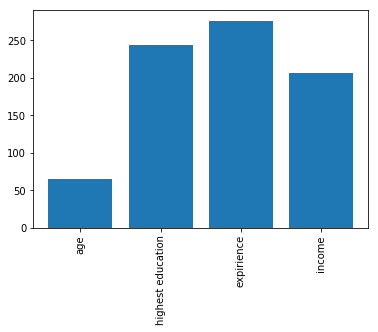

In [30]:
cluster30 = KMeans(n_clusters=30)
cluster_labels = cluster30.fit_predict(mc_num)
mc_num['clusters'] = cluster_labels

plt.figure()
plt.bar(mc_num.keys()[:4], mc_num[mc_num.clusters==0].sum()[0:4].values)
plt.xticks(range(len(mc_num.keys()[:4])), mc_num.keys()[:4], rotation=90)

#### This is consistent with the PCA analysis, it shows the degreee of representation of each variable

('For n_clusters =', 2, 'The average silhouette_score is :', 0.5873699866688661)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.5675074884343634)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.5497614028619116)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.5594209332552116)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.5575641915736554)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.5669779879537667)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.5752438983389271)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.5960702747508165)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.595846440242252)
('For n_clusters =', 11, 'The average silhouette_score is :', 0.6029717708531045)
('For n_clusters =', 12, 'The average silhouette_score is :', 0.6156325338042603)
('For n_clusters =', 13, 'The average silhouette_score is :', 0.6173702008996022)
('For n_clusters =', 14, 

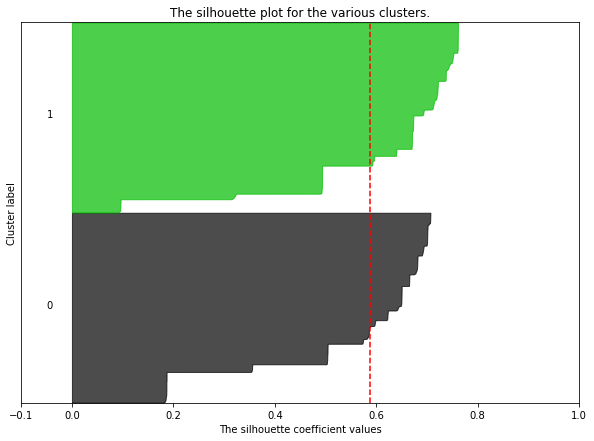

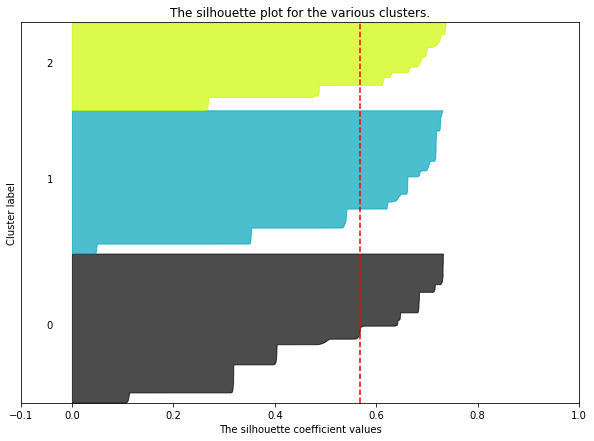

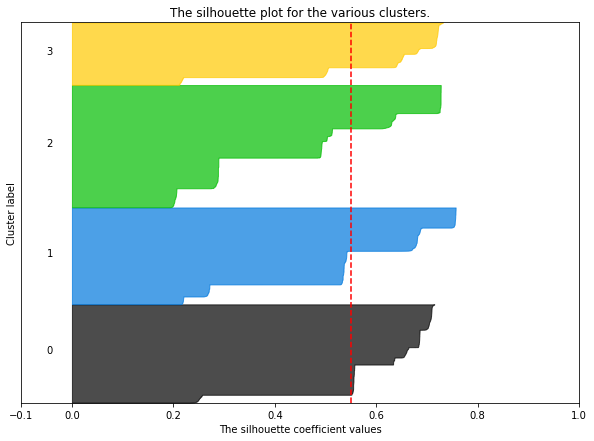

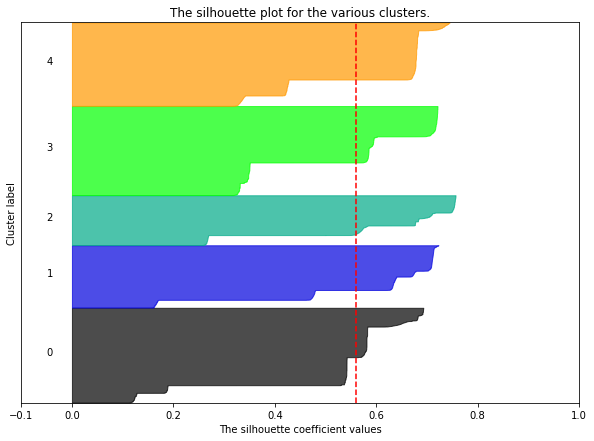

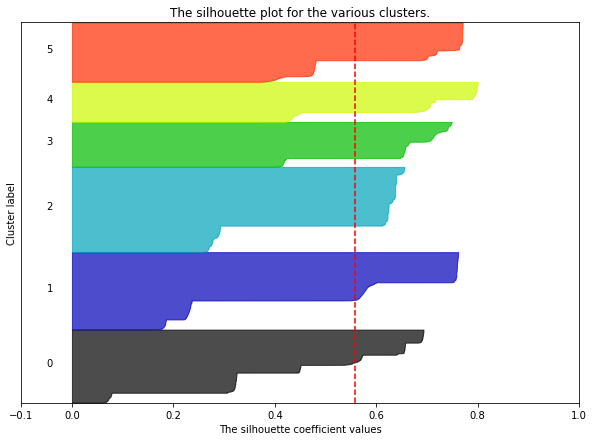

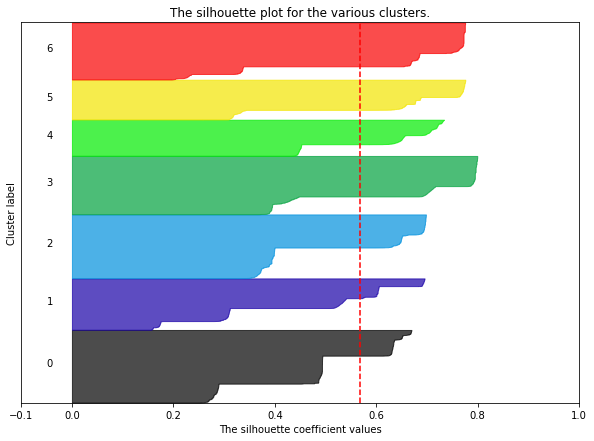

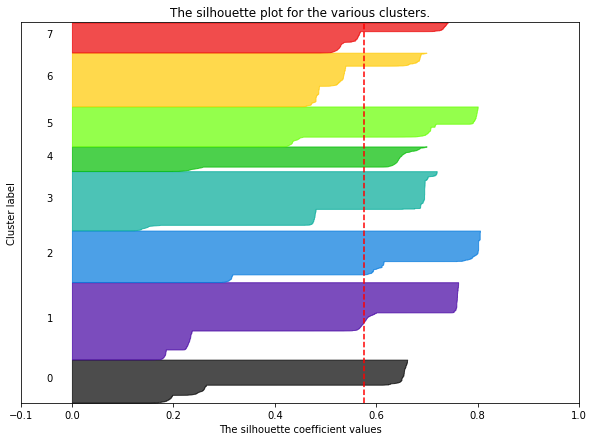

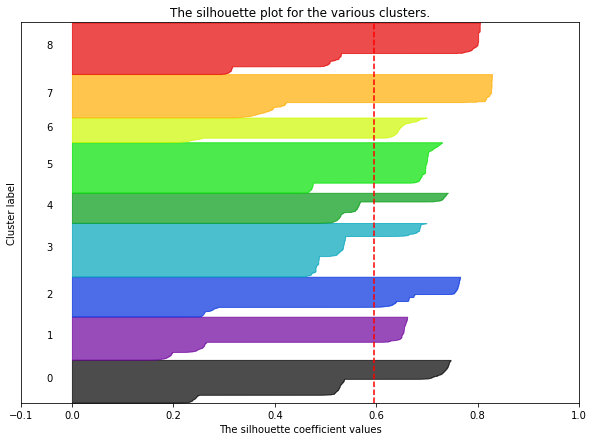

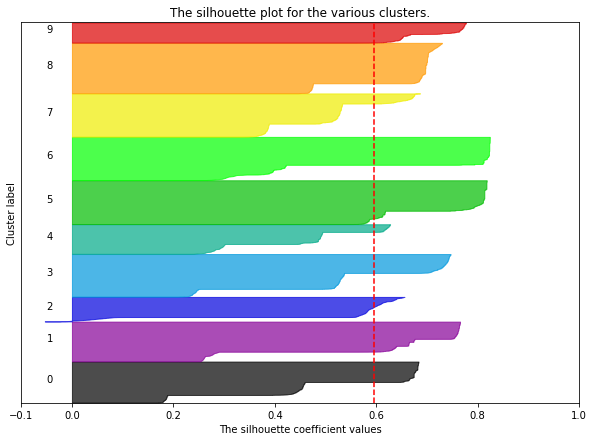

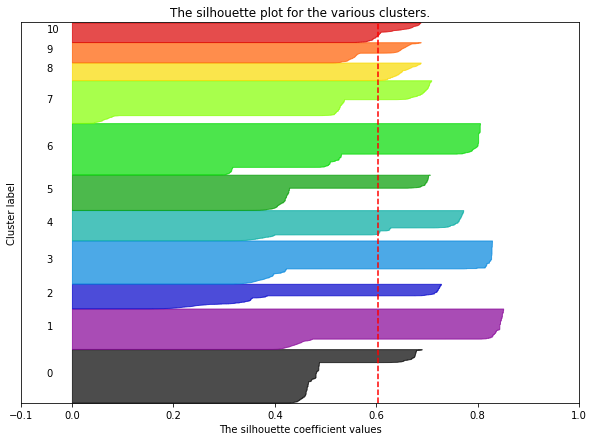

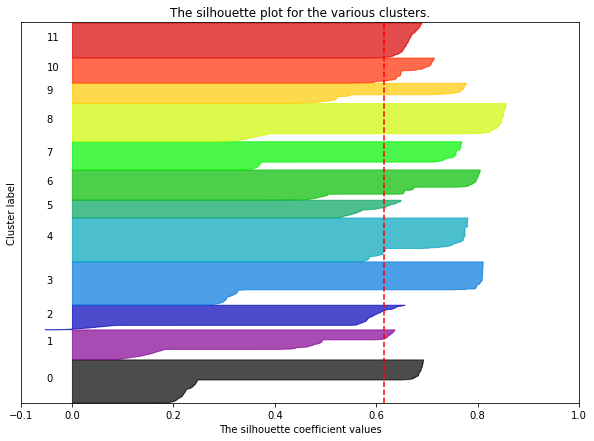

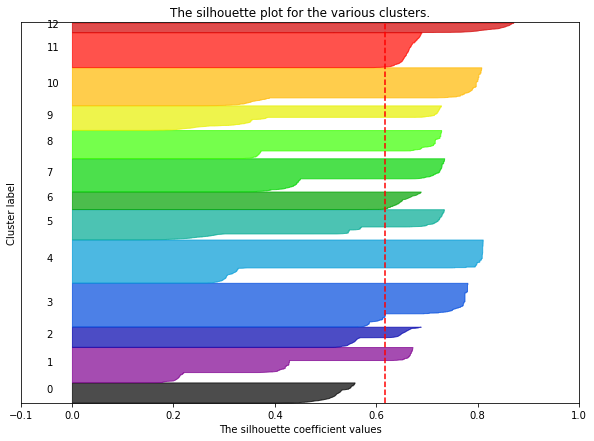

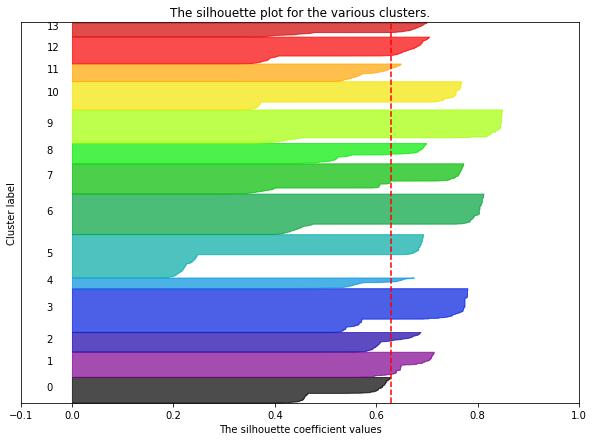

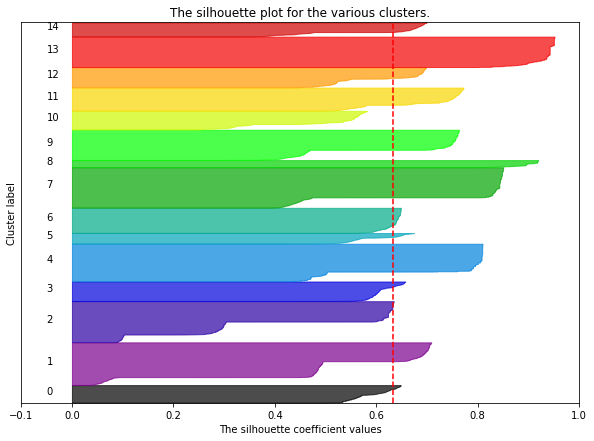

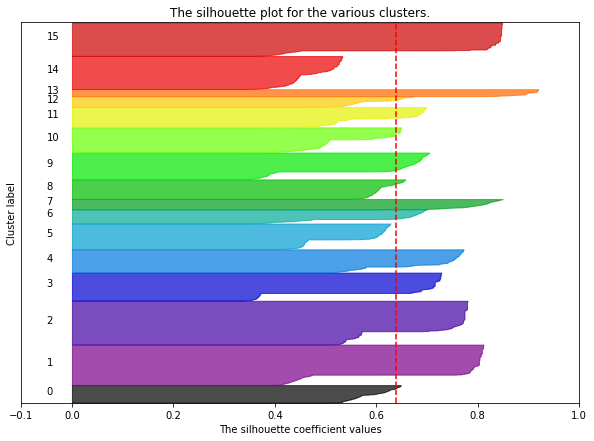

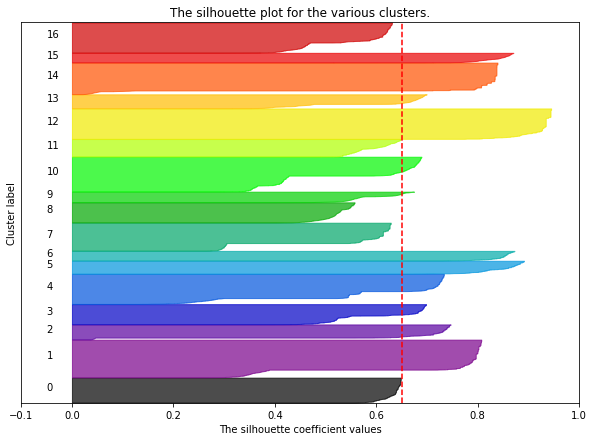

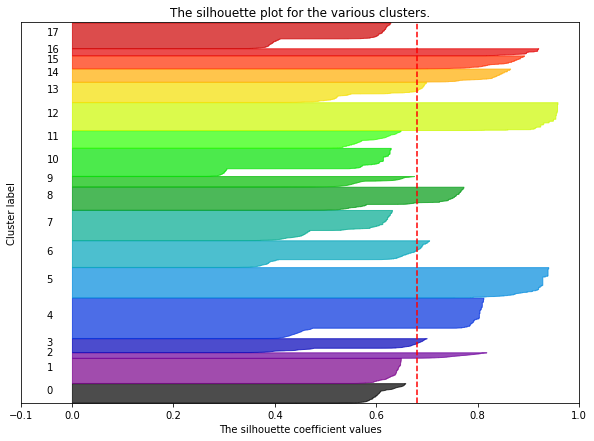

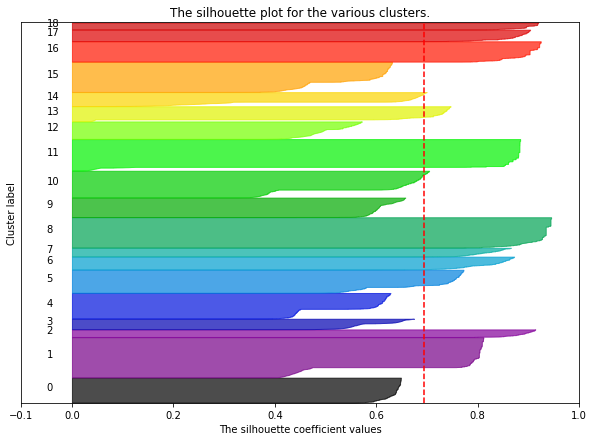

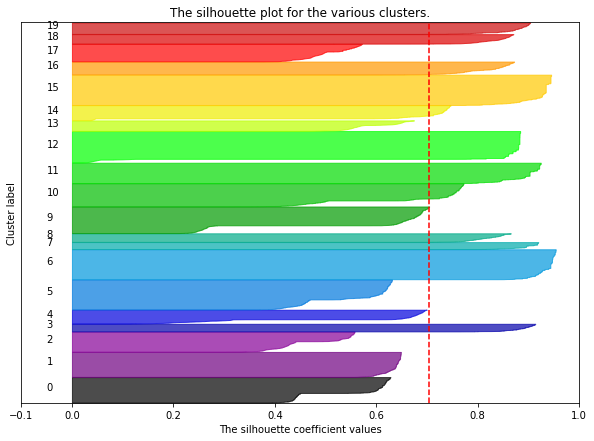

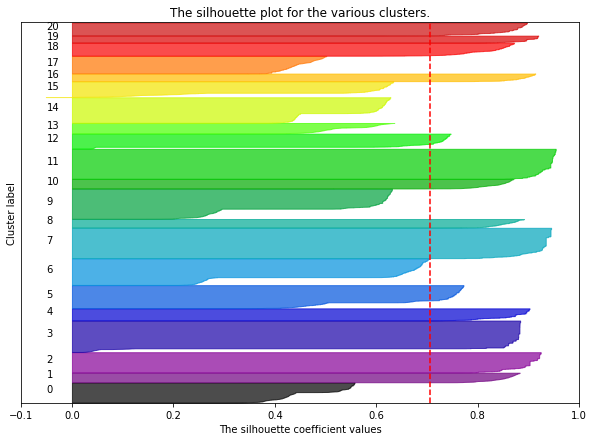

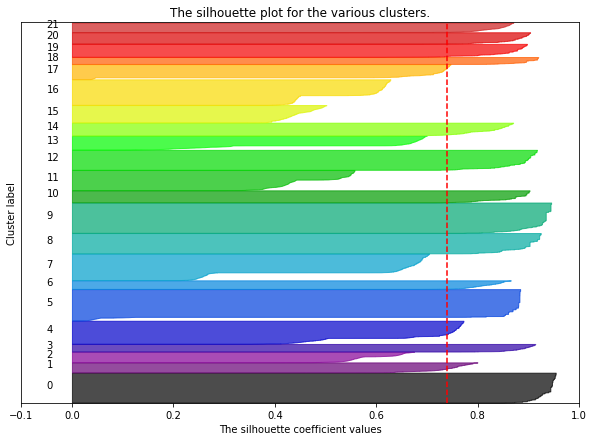

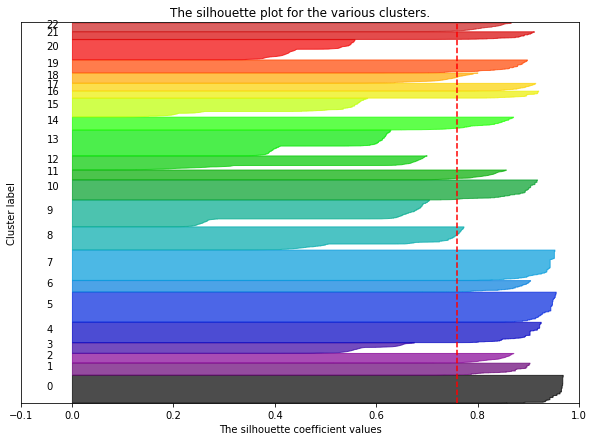

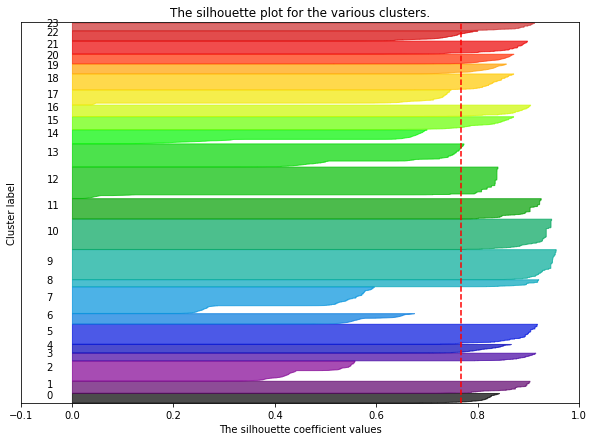

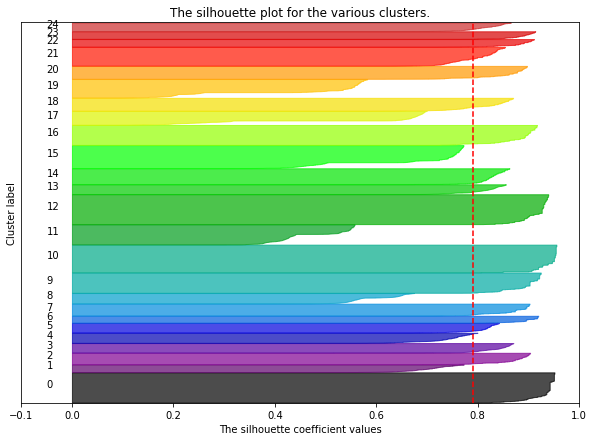

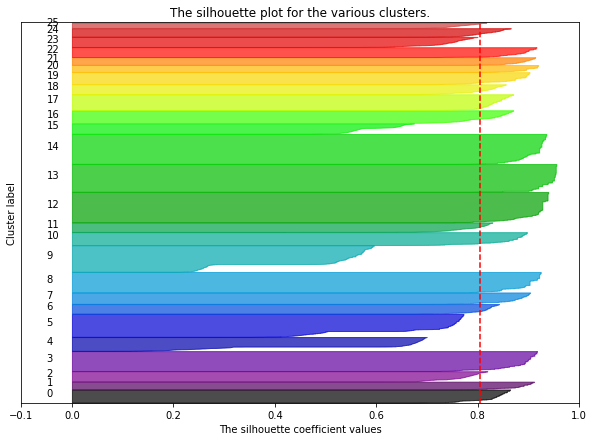

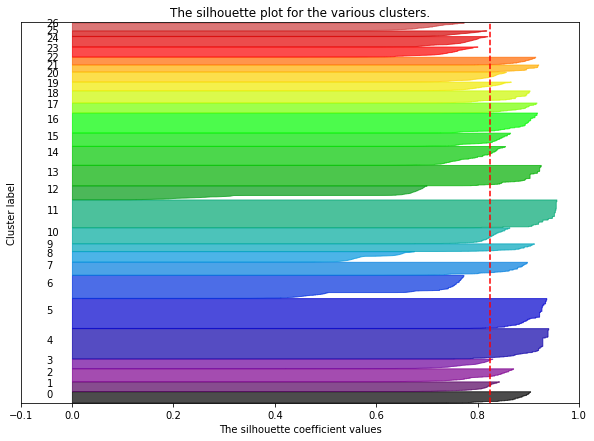

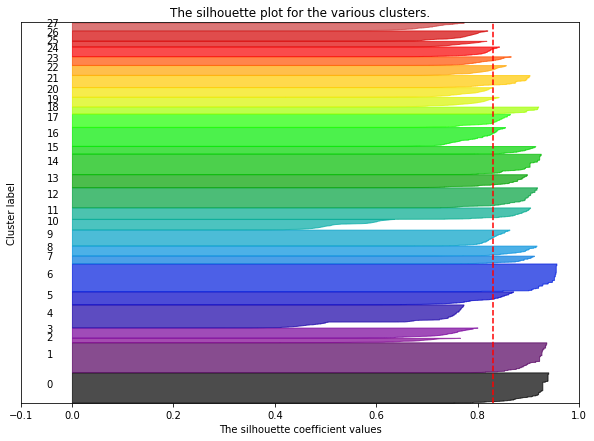

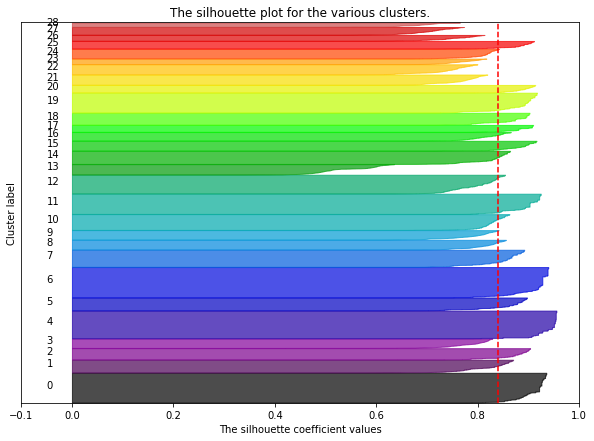

In [371]:
range_n_clusters = np.arange(2,30)
X = mc_num
score = []
for n_clusters in range_n_clusters:

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

Text(0,0.5,'silhouette score')

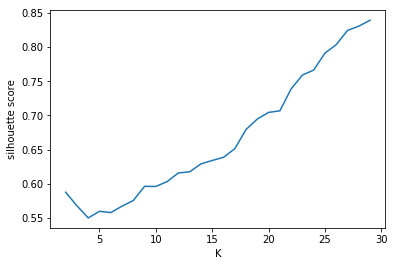

In [372]:
plt.plot(range_n_clusters,score)
plt.xlabel('K')
plt.ylabel('silhouette score')

#### Acoording the above plot relating number of clusters and silhouette score, it is veryfied that the optimal KMeans is with n_clusters=30. It is also important to note for n_clusters=30 that cluster with label 0 is the thickest and has a large coeffcient value, this means is one of the largest clusters and that the points within it are far from neighboring cluster points

# Major - Income Relation

In [31]:
dummies = pd.get_dummies(m_c['Q5'], prefix='Major')
mc_majinc = pd.concat([m_c, dummies], axis=1).groupby(['Q9']).sum().drop(['gender', 'age', 'highest education', 'expirience', 'income'], axis=1)
#mc_majinc.head()

Text(0,0.5,'Second Principal Component')

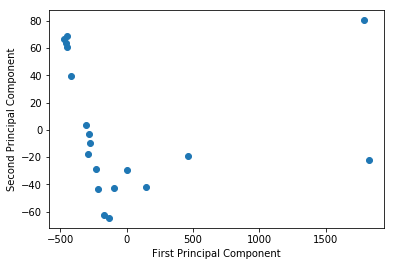

In [32]:
# PCA for 2 components
pca = PCA(n_components=2, svd_solver='full')
pca.fit(mc_majinc)
mc_majinc_pca = pca.transform(mc_majinc)
components = pca.components_

# Plots PCA for 2 components 
plt.figure()

plt.scatter(mc_majinc_pca[:, 0], mc_majinc_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

([<matplotlib.axis.XTick at 0x7fa705f33150>,
 <a list of 14 Text xticklabel objects>)

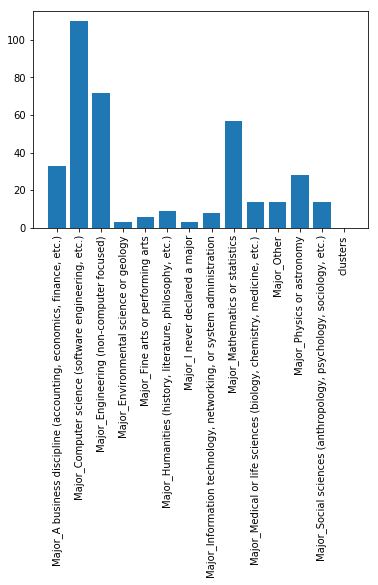

In [33]:
cluster = KMeans(n_clusters=5)
cluster_labels = cluster.fit_predict(mc_majinc)
mc_majinc['clusters'] = cluster_labels

plt.figure()
plt.bar(mc_majinc.keys()[:14], mc_majinc[mc_majinc.clusters==0].sum()[0:14].values)
plt.xticks(range(len(mc_majinc.keys()[:14])), mc_majinc.keys()[:14], rotation=90)

#### According to this, analysis the respondants that majored in computer sciences are correlated with higher incomes

# Industry - Income Relationship

In [34]:
dummies_ind = pd.get_dummies(m_c['Q7'], prefix='Industry')
mc_indinc = pd.concat([m_c, dummies_ind], axis=1).groupby(['Q9']).sum().drop(['gender', 'age', 'highest education', 'expirience', 'income'], axis=1)
#mc_indinc.head()

Text(0,0.5,'Second Principal Component')

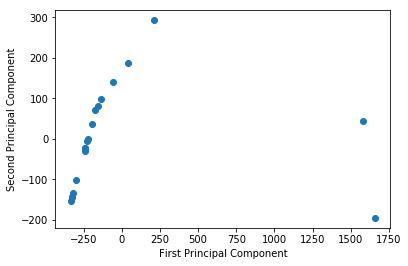

In [35]:
# PCA for 2 components
pca = PCA(n_components=2, svd_solver='full')
pca.fit(mc_indinc)
mc_indinc_pca = pca.transform(mc_indinc)
components = pca.components_

# Plots PCA for 2 components 
plt.figure()

plt.scatter(mc_indinc_pca[:, 0], mc_indinc_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

([<matplotlib.axis.XTick at 0x7fa70bd9c410>,
 <a list of 19 Text xticklabel objects>)

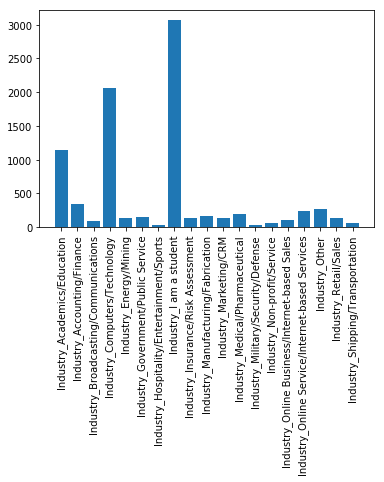

In [36]:
cluster = KMeans(n_clusters=5)
cluster_labels = cluster.fit_predict(mc_indinc)
mc_indinc['clusters'] = cluster_labels

plt.figure()
plt.bar(mc_indinc.keys()[:19], mc_indinc[mc_indinc.clusters==0].sum()[0:19].values)
plt.xticks(range(len(mc_indinc.keys()[:19])), mc_indinc.keys()[:19], rotation=90)

# Expirience - Income Relationship 

In [37]:
dummies_exp = pd.get_dummies(m_c['Q8'], prefix='Expirience')
mc_expinc = pd.concat([m_c, dummies_exp], axis=1).groupby(['Q9']).sum().drop(['gender', 'age', 'highest education', 'expirience', 'income'], axis=1)
#mc_expinc.head()

Text(0,0.5,'Second Principal Component')

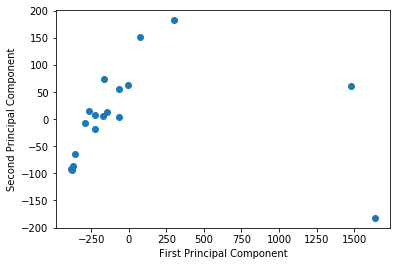

In [38]:
# PCA for 2 components
pca = PCA(n_components=2, svd_solver='full')
pca.fit(mc_expinc)
mc_expinc_pca = pca.transform(mc_expinc)
components = pca.components_

# Plots PCA for 2 components 
plt.figure()

plt.scatter(mc_expinc_pca[:, 0], mc_expinc_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

([<matplotlib.axis.XTick at 0x7fa70bb9ce50>,
 <a list of 11 Text xticklabel objects>)

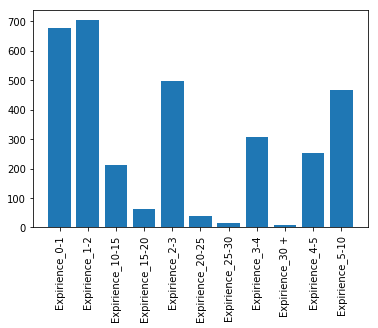

In [39]:
cluster = KMeans(n_clusters=5)
cluster_labels = cluster.fit_predict(mc_expinc)
mc_expinc['clusters'] = cluster_labels

plt.figure()
plt.bar(mc_expinc.keys()[:11], mc_expinc[mc_expinc.clusters==3].sum()[0:11].values)
plt.xticks(range(len(mc_expinc.keys()[:11])), mc_expinc.keys()[:11], rotation=90)

#### The above graph is counter makes sense when considering the expirience 5-10 and 10-15. But it is interesting to note that expririence of less than a year have greater income than people who have more expirience at the field

# Use of ML methods - The rest of predictors Relationship 

In [40]:
mc_num['Use of ML methods'] = m_c['Q10']
mc_num = mc_num.dropna()
#mc_num.head()

In [41]:
mc_num['Use of ML methods'] = np.where(mc_num['Use of ML methods'] == 'I do not know', 0, mc_num['Use of ML methods'] )
mc_num['Use of ML methods'] = np.where(mc_num['Use of ML methods'] == 'No (we do not use ML methods)', 0, mc_num['Use of ML methods'] )
mc_num['Use of ML methods'] = np.where(mc_num['Use of ML methods'] == 'We are exploring ML methods (and may one day put a model into production)', 0, mc_num['Use of ML methods'] )
mc_num['Use of ML methods'] = np.where(mc_num['Use of ML methods'] == 'We have well established ML methods (i.e., models in production for more than 2 years)', 1, mc_num['Use of ML methods'] )
mc_num['Use of ML methods'] = np.where(mc_num['Use of ML methods'] == 'We recently started using ML methods (i.e., models in production for less than 2 years)', 1, mc_num['Use of ML methods'] )
mc_num['Use of ML methods'] = np.where(mc_num['Use of ML methods'] == 'We use ML methods for generating insights (but do not put working models into production)', 1, mc_num['Use of ML methods'] )

#mc_num['Use of ML methods'].unique()
#mc_num['Use of ML methods'].value_counts()

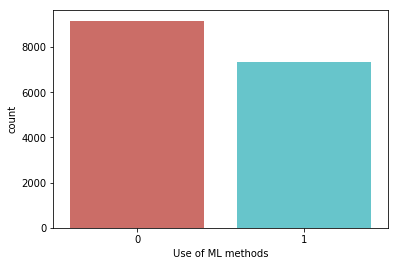

In [42]:
sns.countplot(x='Use of ML methods', data=mc_num, palette='hls')

#### The majority of respondants do not use machine learning methods for their work

In [43]:
mc_num.groupby('Use of ML methods').mean()

,age,highest education,expirience,income,clusters
Use of ML methods,,,,,
0,0.175268,0.603665,0.352056,0.183714,13.661032
1,0.177884,0.607453,0.356190,0.179747,13.710287


#### The above chart give us some insight of the type of population who uses and who dont, ML. Both populations arevery similar, this tells us there is possibly a almost no correlation between this variables and the predictors, so it doesnt have sense to continue nalyzing this relationship. It is counter intuitive that the non-use of ML methods is related to lower income